In [1]:
import ROOT as r

Welcome to JupyROOT 6.26/06


In [2]:
r.ROOT.EnableImplicitMT()

In [3]:
r.gStyle.SetPalette(r.kCividis)
#r.gStyle.SetOptStat(1111110)
r.gStyle.SetOptStat(0)

In [4]:
df = r.ROOT.RDataFrame("muonsSBT", "../muonDISCavern/muonsNewProduction.root")

In [5]:
df_augmented = df.Define("P", "sqrt(px*px+py*py+pz*pz)")\
        .Define("theta", "TMath::ATan2(abs(px), pz)")\
        .Define("dzmin", "25-z")\
        .Define("dzmax", "-25-z")\
        .Define("alphamin", "TMath::Pi()/2. + TMath::ATan2(dzmin, 10)")\
        .Define("alphamax", "TMath::Pi()/2. - TMath::ATan2(dzmax, 10)")\
        .Define("alpha", "std::min(theta+alphamin, 2*TMath::Pi()-(theta+alphamin))")

In [6]:
h_map = df_augmented.Histo2D(("h_map", ";z [m];x [m]", 100, -60, 40, 100, -10, 15), "z", "x")

In [7]:
h1 = df_augmented.Histo1D(("h1", "Momentum;P [GeV/c];", 100, 0, 100), "P", "w")

In [8]:
h2 = df_augmented.Histo2D(("h", ";z [m]; P [GeV/c]", 100, -60, +36, 10, 3, 100), "z", "P", "w")

In [9]:
h3 = df_augmented.Histo1D("theta", "w")

In [10]:
h4 = df_augmented.Histo2D(("h4", "#theta iso z", 100, -60, +36, 100, 0, 1), "z", "theta", "w")

In [11]:
h5 = df_augmented.Histo2D(("h6", "#alpha_{min} iso z", 100, -60, 36, 100, 0, r.TMath.Pi()), "z", "alphamin", "w")

In [12]:
h6 = df_augmented.Histo2D(("h6", "#alpha_{min} iso #theta", 100, 0, 1, 100, 0, 2*r.TMath.Pi()), "theta", "alphamin", "w")

In [13]:
h7 = df_augmented.Histo1D(("h7", "", 100, 0, r.TMath.Pi()+0.001), "alpha", "w")

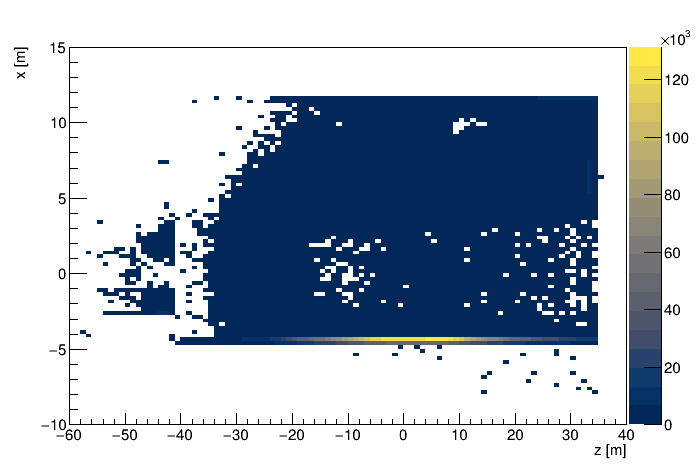

In [14]:
c_map = r.TCanvas()
h_map.Draw('colz')
c_map.Draw()

In [41]:
c_map.SaveAs("cavern.pdf")
c_map.SaveAs("cavern.tex")

Info in <TCanvas::Print>: pdf file cavern.pdf has been created
Info in <TCanvas::Print>: TeX file cavern.tex has been created


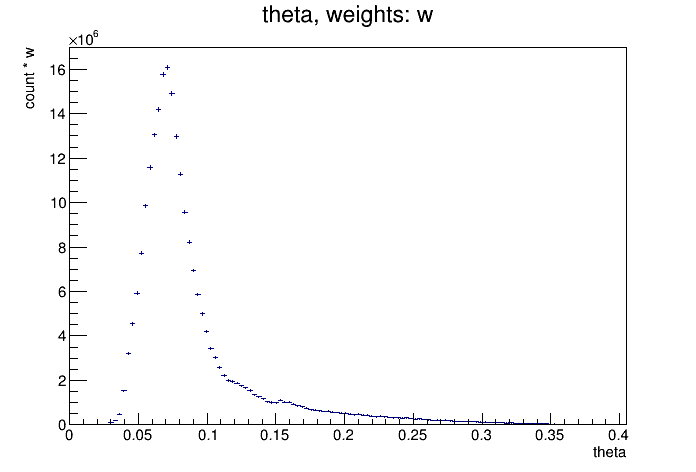

In [15]:
c1 = r.TCanvas()

h3.Draw()
c1.Draw()

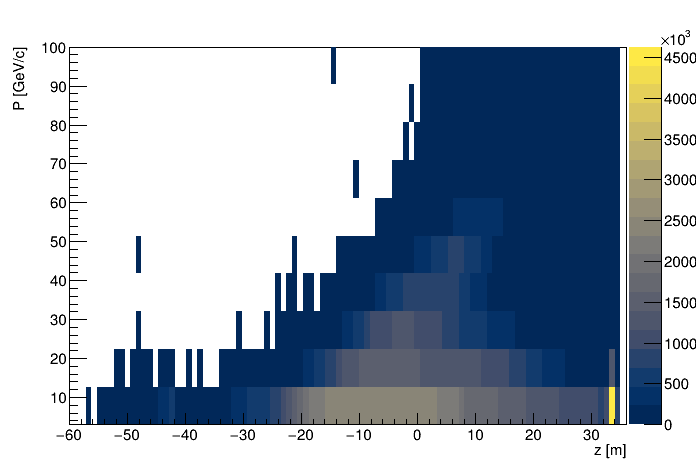

In [16]:
c2 = r.TCanvas()

h2.Draw("colz")

c2.Draw()

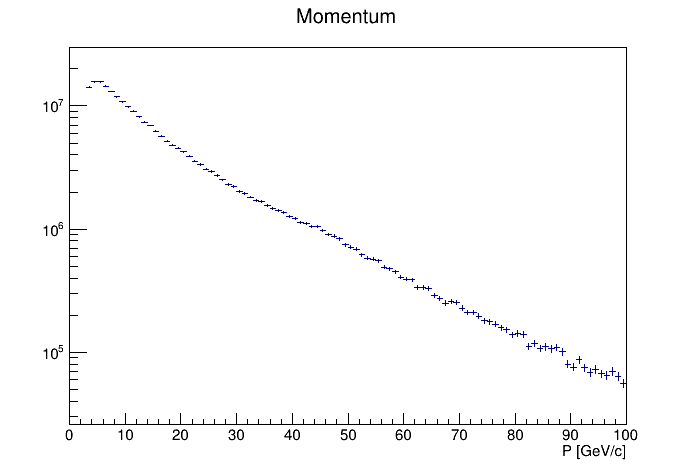

In [17]:
c1 = r.TCanvas()
h1.Draw()
c1.SetLogy()
c1.Draw()

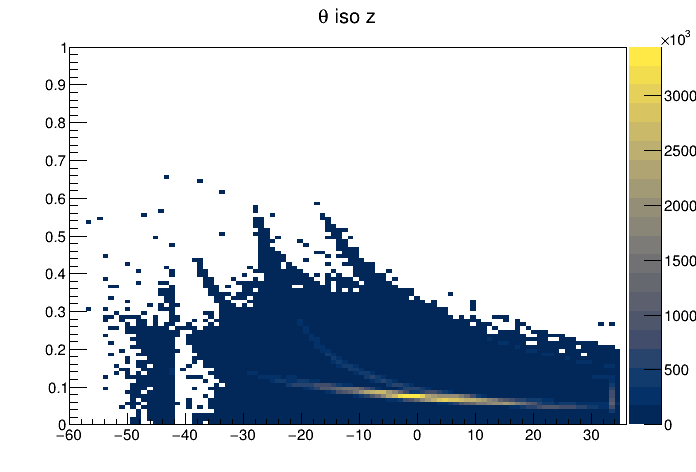

In [18]:
c4 = r.TCanvas()

h4.Draw("colz")
c4.Draw()

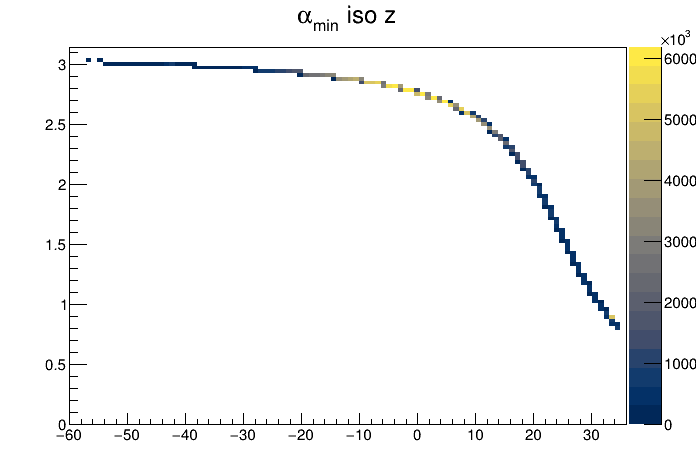

In [19]:
c5 = r.TCanvas()

h5.Draw("colz")
c5.Draw()

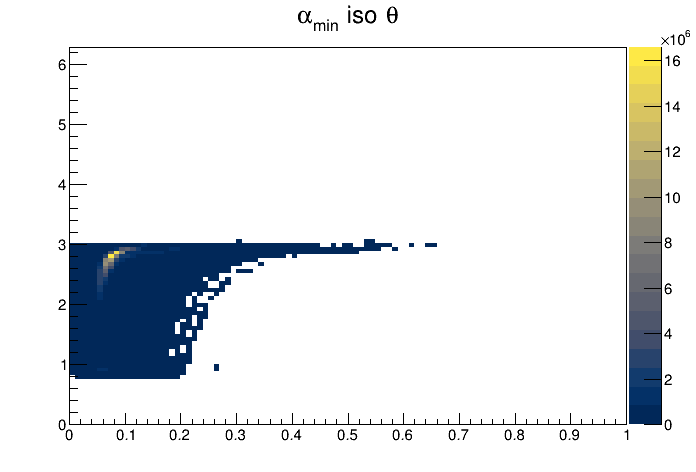

In [20]:
c6 = r.TCanvas()

h6.Draw("colz")

c6.Draw()

In [21]:
r.gStyle.SetOptStat(11111111)

In [22]:
c7 = r.TCanvas()

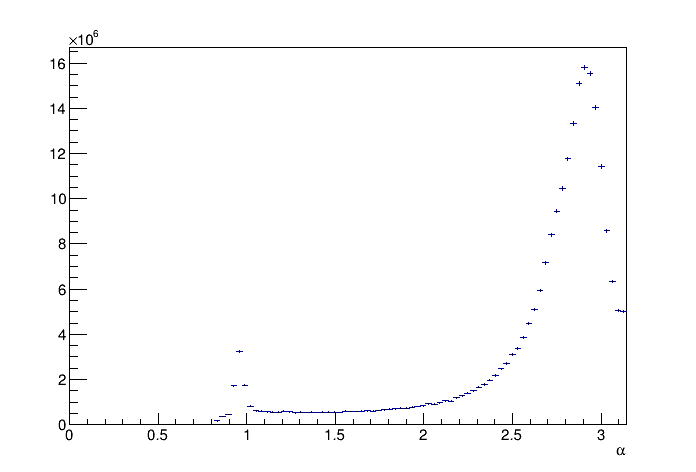

In [23]:
h7.SetTitle(";#alpha")
h7.Draw()
c7.Draw()

In [24]:
c7.SaveAs("theta_to_vessel.pdf")
c7.SaveAs("theta_to_vessel.tex")

Info in <TCanvas::Print>: pdf file theta_to_vessel.pdf has been created
Info in <TCanvas::Print>: TeX file theta_to_vessel.tex has been created


In [25]:
r.gStyle.SetOptStat(0)

In [26]:
c8 = r.TCanvas()

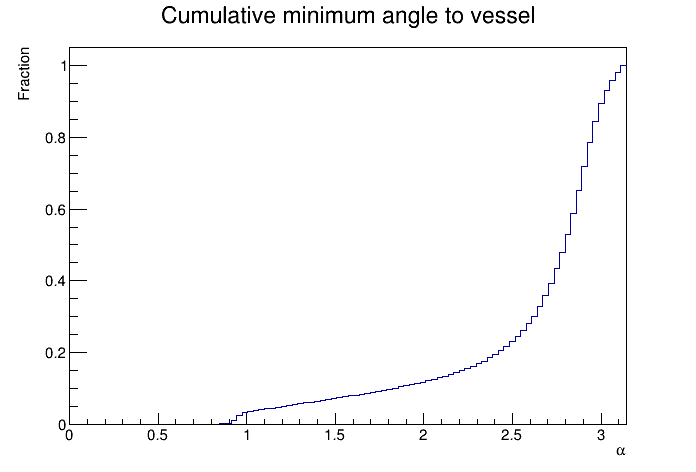

In [27]:
h8 = h7.GetCumulative()
h8.Scale(1./h7.Integral(), "nosw2")
h8.SetTitle("Cumulative minimum angle to vessel; #alpha; Fraction")
h8.Draw()
c8.Draw()

In [28]:
c8.SaveAs("cumulative_theta_to_vessel.png")
c8.SaveAs("cumulative_theta_to_vessel.tex")

Info in <TCanvas::Print>: png file cumulative_theta_to_vessel.png has been created
Info in <TCanvas::Print>: TeX file cumulative_theta_to_vessel.tex has been created


In [29]:
c9 = r.TCanvas("c", "c", 600, 400)

In [30]:
ax7 = h7.GetXaxis()
ax7.CenterTitle(True)

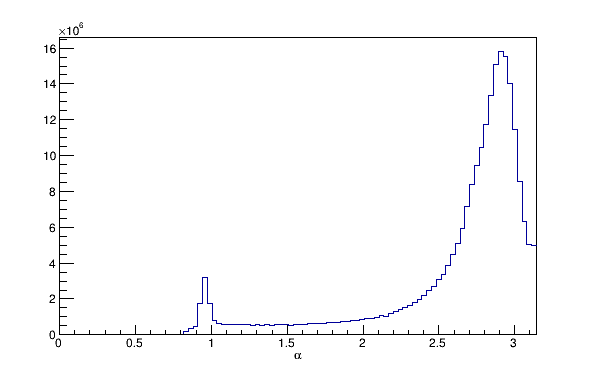

In [31]:
h7.Draw("hist")
c9.Draw()

In [32]:
h7.GetMean()

2.6213493597883577

In [33]:
for bin, value in enumerate(h7.GetValue()):
    if value != 0.0:
        print(h7.GetBinCenter(bin), value)
        break

0.8013611266653973 341.5350036621094


In [34]:
rightmax = 1.1*h8.GetMaximum()
scale    = c9.GetUymax()/rightmax

h8.SetLineColor(r.kRed)
h8.Scale(scale)
h8.Draw("same")

In [35]:
print(r.gPad.GetUxmin(), r.gPad.GetUxmax())
print(r.gPad.GetUymin(), r.gPad.GetUymax())

0.0 3.142592653589793
0.0 16609097.814081214


In [36]:
ax = r.TGaxis(c9.GetUxmax(), c9.GetUymin(),
              c9.GetUxmax(), c9.GetUymax(),
              0, rightmax, 510, "+L")
ax.SetLineColor(r.kRed)
ax.SetLabelColor(r.kRed)
ax.SetTitleColor(r.kRed)
ax.SetTitle("Cumulative fraction")
ax.CenterTitle(True)
# ax.RotateTitle(true)
ax.Draw()

In [37]:
ax7.SetNdivisions(-502)
ax7.ChangeLabel(-1,-1,-1,-1,-1,-1,"#pi")
ax7.ChangeLabel(-2,-1,-1,-1,-1,-1,"#pi/2")
ax7.SetTitleSize(0.05)

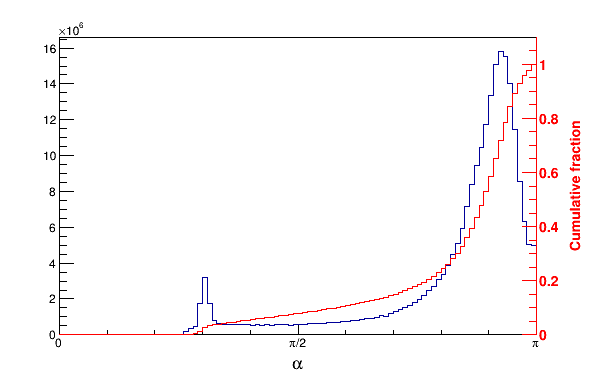

In [38]:
c9.Draw()

In [39]:
c9.SaveAs("combined_theta_to_vessel.png")
c9.SaveAs("combined_theta_to_vessel.tex")

Info in <TCanvas::Print>: png file combined_theta_to_vessel.png has been created
Info in <TCanvas::Print>: TeX file combined_theta_to_vessel.tex has been created
